### Introduction - Explore the Titanic survivors dataset using sklearn

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Let´s see if we can predict which type of passenger was most likely to survive, using decision-tree based classifiers

### Import Data

If you are using Linux/Mac, you can download the data using the cell below. On Windows, it´s recommended to download the data manually, save it in the same folder as this .ipnyb file, and skipping directly to cell 2

In [1]:
!wget https://raw.githubusercontent.com/egrochos/DevNetCreate2019/master/titanic.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')

Let´s take a look at our data:

In [3]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explanation of the columns:**

**Survived** - 1 if survived, 0 if not

**Pclass** - A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**SibSp** - Number of Sibling/Spouse aboard

**Parch** - Number of Parent/Children aboard

**Embarked** - The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

### Feature Selection

The columns we will use for the prediction are Pclass, Sex, Age, SibSp, Parch and Fare (plus Survived which will be the value we will predict)

In [4]:
cols_to_use = ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']
df = df[cols_to_use]

In [5]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


Let´s check if there are any null values in the data

In [6]:
df.isnull().values.any()

True

It seems that we have a couple of null values in the dataset. We wont be able to train a model with a dataset that contains null values, so let´s drop these to avoid errors.

In [7]:
df = df.dropna()

Let´s save the value we will predict to a variable called **labels**, and the values we will use for the prediction (everything else) to a variable called **features**

In [8]:
features = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
labels = df['Survived']

Before proceeding, we need to convert Sex into an integer value of 0 or 1

In [9]:
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let´s check the details of a random passenger, and if they survived or not

In [10]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


### Train the model

Ok, now let´s train the model using the cleaned data. But before that, let´s split our dataset in train and test datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

And here we train our model using the training data:

In [12]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier()
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Let´s now make some predictions, and compare with the ground truth data (y_test):

In [13]:
from sklearn.metrics import accuracy_score

y_predict = DecisionTreeModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.7318435754189944

We achieved an accuracy of ~73%, better than a 50/50 guessing but still could be better. Let´s see how other classifier methods (such as RandomForestClassifier) fare:

In [14]:
from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500,max_depth=None,random_state=10)
RandomForestModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [15]:
y_predict = RandomForestModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.8100558659217877

Accuracy improved to 81%, nice improvement!

### Let´s print our decision tree

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0

### Also let´s check the importance of each feature

In [17]:
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':RandomForestModel.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.430488
Fare,0.191178
Age,0.183515
Pclass,0.130419
SibSp,0.035417
Parch,0.028982


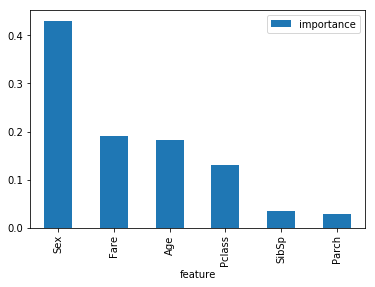

In [19]:
importances.plot.bar()